<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_08_nn_keras__V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Santiago Londoño 1000084281
# Laboratorio 8 Keras

1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.
2. Para el dataset load digits, construir un modelo de red neuronal con keras para realizar la clasificación.

# 1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2025-02-11 08:02:06.312068: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 08:02:06.317081: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-11 08:02:06.413942: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-11 08:02:06.414093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-11 08:02:06.415050: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Datos

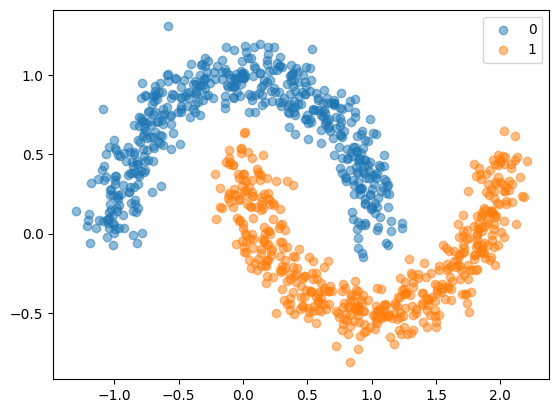

In [2]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=1)

plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0', alpha=0.5) 

plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1', alpha=0.5)
plt.legend()
plt.show()

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
tf.keras.backend.clear_session()


In [4]:
# Dividiendo los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=35)

Epoch 1/35
25/25 [==============================] - 2s 24ms/step - loss: 0.6757 - accuracy: 0.7063 - val_loss: 0.6604 - val_accuracy: 0.7400
Epoch 2/35
25/25 [==============================] - 0s 6ms/step - loss: 0.6455 - accuracy: 0.7487 - val_loss: 0.6268 - val_accuracy: 0.7800
Epoch 3/35
25/25 [==============================] - 0s 6ms/step - loss: 0.6107 - accuracy: 0.7925 - val_loss: 0.5870 - val_accuracy: 0.8300
Epoch 4/35
25/25 [==============================] - 0s 11ms/step - loss: 0.5696 - accuracy: 0.8250 - val_loss: 0.5387 - val_accuracy: 0.8550
Epoch 5/35
25/25 [==============================] - 0s 8ms/step - loss: 0.5213 - accuracy: 0.8288 - val_loss: 0.4868 - val_accuracy: 0.8550
Epoch 6/35
25/25 [==============================] - 0s 5ms/step - loss: 0.4712 - accuracy: 0.8338 - val_loss: 0.4339 - val_accuracy: 0.8550
Epoch 7/35
25/25 [==============================] - 0s 8ms/step - loss: 0.4225 - accuracy: 0.8388 - val_loss: 0.3875 - val_accuracy: 0.8600
Epoch 8/35
25/25 [

## Evaluación de la exactitud

In [5]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss)

7/7 - 0s - loss: 0.2124 - accuracy: 0.9050 - 80ms/epoch - 11ms/step

Test accuracy: 0.9049999713897705 
Test loss: 0.21236740052700043


In [6]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print('\nTrain accuracy:', train_acc, '\nTrain loss:', train_loss)

25/25 - 0s - loss: 0.2190 - accuracy: 0.8900 - 97ms/epoch - 4ms/step

Train accuracy: 0.8899999856948853 
Train loss: 0.2190493643283844


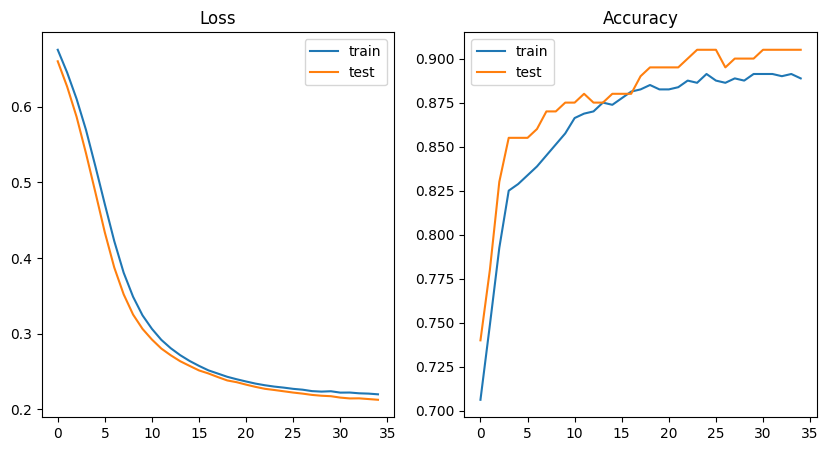

In [7]:
plt.figure(figsize=(10,5))

# Loss
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Accuracy
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.show()

# 2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
digits = load_digits(n_class = 10)
X = digits.data
y = keras.utils.to_categorical(digits.target, num_classes = 10)  # codificación one-hot

X.shape

(1797, 64)

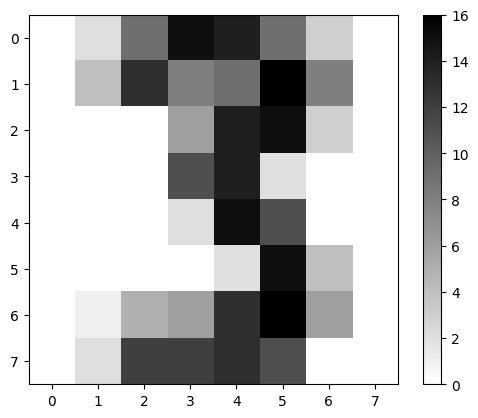

In [10]:
plt.imshow(X[13].reshape(8, 8), cmap="gray_r")
plt.colorbar()

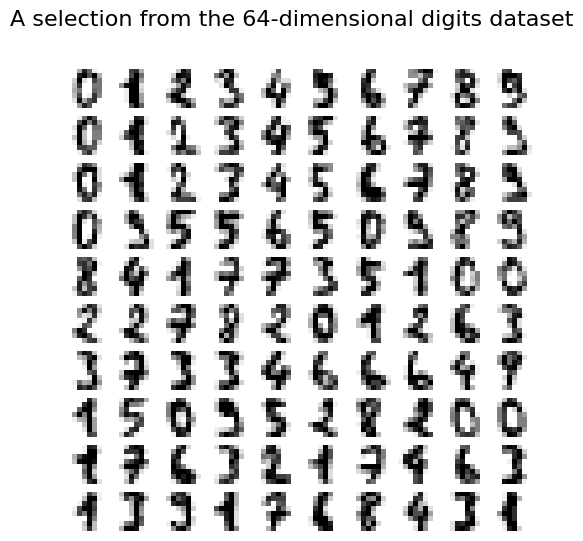

In [11]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [12]:
modelo_digitos = keras.models.Sequential()
modelo_digitos.add(keras.layers.Dense(128, input_dim = 64, activation='relu'))
modelo_digitos.add(keras.layers.Dense(64, activation='relu'))
modelo_digitos.add(keras.layers.Dense(32, activation='relu'))
modelo_digitos.add(keras.layers.Dense(32, activation='relu'))
modelo_digitos.add(keras.layers.Dense(10, activation='softmax'))
optimizador = keras.optimizers.Adam(learning_rate=0.01)
modelo_digitos.compile(loss = 'categorical_crossentropy', optimizer = optimizador, metrics=['accuracy'])

In [13]:
keras.backend.clear_session()

numero_datos_entrenamiento = int(X.shape[0] * 0.8)

train_X = X[:numero_datos_entrenamiento, :] # Cada fila es un dato
test_X = X[numero_datos_entrenamiento:, :]
train_y = y[:numero_datos_entrenamiento]
test_y = y[numero_datos_entrenamiento:]
dimension_entrada = X.shape[1]
history = modelo_digitos.fit(train_X, train_y, validation_data=(test_X, test_y), epochs = 40, verbose=1)

Epoch 1/40
45/45 [==============================] - 2s 16ms/step - loss: 1.2208 - accuracy: 0.6068 - val_loss: 0.7575 - val_accuracy: 0.8000
Epoch 2/40
45/45 [==============================] - 0s 9ms/step - loss: 0.3383 - accuracy: 0.8991 - val_loss: 0.6662 - val_accuracy: 0.8306
Epoch 3/40
45/45 [==============================] - 0s 9ms/step - loss: 0.1802 - accuracy: 0.9429 - val_loss: 0.5022 - val_accuracy: 0.8639
Epoch 4/40
45/45 [==============================] - 0s 9ms/step - loss: 0.2234 - accuracy: 0.9255 - val_loss: 0.6990 - val_accuracy: 0.8250
Epoch 5/40
45/45 [==============================] - 1s 12ms/step - loss: 0.1611 - accuracy: 0.9534 - val_loss: 0.8039 - val_accuracy: 0.8139
Epoch 6/40
45/45 [==============================] - 0s 11ms/step - loss: 0.1470 - accuracy: 0.9569 - val_loss: 0.3979 - val_accuracy: 0.8917
Epoch 7/40
45/45 [==============================] - 1s 15ms/step - loss: 0.1315 - accuracy: 0.9589 - val_loss: 0.4045 - val_accuracy: 0.8889
Epoch 8/40
45/45

In [15]:
test_loss, test_acc = modelo_digitos.evaluate(test_X,  test_y, verbose=2)

print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss)

12/12 - 0s - loss: 0.4346 - accuracy: 0.9139 - 96ms/epoch - 8ms/step

Test accuracy: 0.9138888716697693 
Test loss: 0.43460363149642944


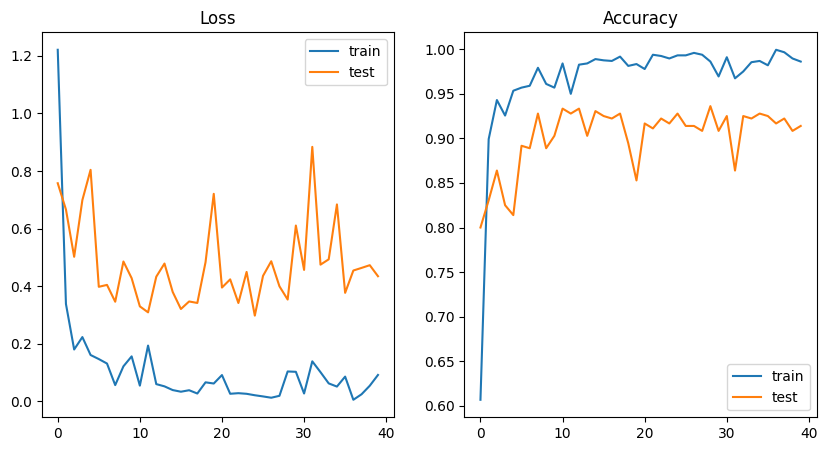

In [17]:
plt.figure(figsize=(10,5))

# Loss
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Accuracy
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=75e9ce73-2bd0-4d4d-851b-c8f87498fb7b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>